<a href="https://colab.research.google.com/github/Judy-Choi/Tensorflow_Certificate/blob/main/10_Cutlery_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터셋 준비하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

fork_dir = os.path.join('/content/drive/MyDrive/cutlery/train/fork')
knife_dir = os.path.join('/content/drive/MyDrive/cutlery/train/knife')
spoon_dir = os.path.join('/content/drive/MyDrive/cutlery/train/spoon')

print('total training fork images:', len(os.listdir(fork_dir)))
print('total training knife images:', len(os.listdir(knife_dir)))
print('total training spoon images:', len(os.listdir(spoon_dir)))

fork_files = os.listdir(fork_dir)
knife_files = os.listdir(knife_dir)
spoon_files = os.listdir(spoon_dir)

total training fork images: 20
total training knife images: 20
total training spoon images: 19


## 2. Data Preprocessing

## 이미지 파일 검증 코드

In [ ]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/cutlery/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

### 데이터 파일 예시

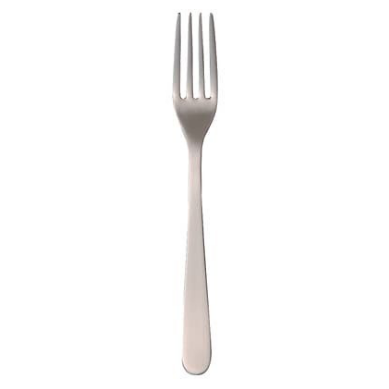

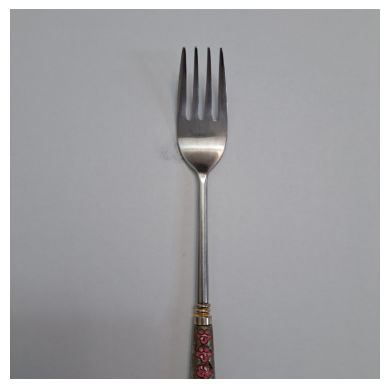

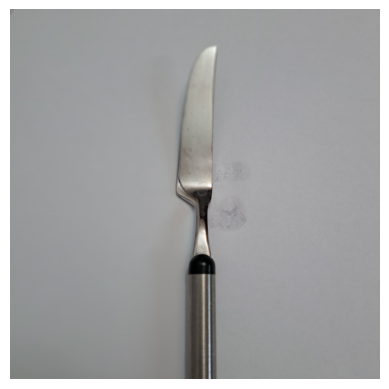

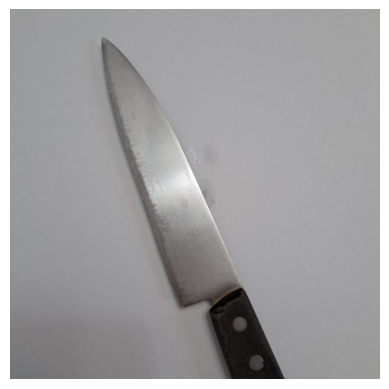

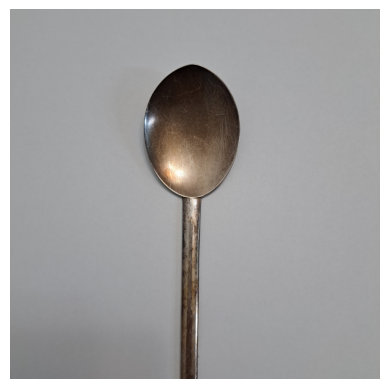

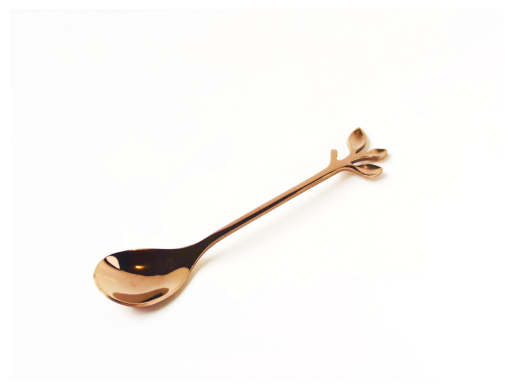

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_fork = [os.path.join(fork_dir, fname) 
                for fname in fork_files[pic_index-2:pic_index]]
next_knife = [os.path.join(knife_dir, fname) 
                for fname in knife_files[pic_index-2:pic_index]]
next_spoon = [os.path.join(spoon_dir, fname) 
                for fname in spoon_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_fork+next_knife+next_spoon):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### data augmentation (data를 다양한 방법으로 generation 함) 기법에는 ImageDataGenerator 를 사용함 

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/cutlery/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/cutlery/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 60 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


# 4. 모델설계하기

In [ ]:
model = Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

# 5. 모델 모니터링하기

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = "checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
     save_weights_only=True,
     save_best_only = True,
     monitor='val_loss',
     verbose=1)

# 6. 모델 학습하기

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint])

model.save("cutlery.h5")  #최고 퍼포먼스를 보인 epochs에서 모델을 save

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 1.1932 - accuracy: 0.2167 
Epoch 1: val_loss improved from inf to 1.17676, saving model to checkpoint.ckpt
2/2 [==============================] - 25s 10s/step - loss: 1.1932 - accuracy: 0.2167 - val_loss: 1.1768 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 1.1192 - accuracy: 0.3333
Epoch 2: val_loss improved from 1.17676 to 1.11138, saving model to checkpoint.ckpt
2/2 [==============================] - 4s 2s/step - loss: 1.1192 - accuracy: 0.3333 - val_loss: 1.1114 - val_accuracy: 0.2222
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 1.1076 - accuracy: 0.3333
Epoch 3: val_loss did not improve from 1.11138
2/2 [==============================] - 6s 3s/step - loss: 1.1076 - accuracy: 0.3333 - val_loss: 1.1471 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 1.1165 - accuracy: 0.2833
Epoch 4: val_loss improved from 1.11138 

# 7. 모델 검증하기

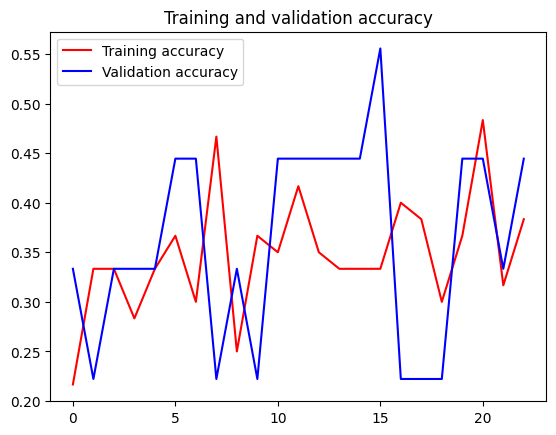

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Homework 1 : CNN - 1.08521

In [ ]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Computer Vision with CNNs
#
# For this task you will build a classifier for fork-knife-spoon 
# based on the rps dataset.
#
# IMPORTANT: Your final layer should be as shown, do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.


import urllib.request
import zipfile
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def solution_model():
    TRAINING_DIR = "/content/drive/MyDrive/cutlery/train"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE)
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )
    
    # validation_datagen
    VALIDATION_DIR = "/content/drive/MyDrive/cutlery/test"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    # validation_generator
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )

    ## 300, 300, 3 으로 변경
    model = tf.keras.models.Sequential([
    # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only = True,
        monitor='val_loss',
        verbose=1)
    
    history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint])


    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Found 60 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 1.4995 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 1.08521, saving model to checkpoint.ckpt
2/2 [==============================] - 9s 4s/step - loss: 1.4995 - accuracy: 0.2500 - val_loss: 1.0852 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 1.1177 - accuracy: 0.3333
Epoch 2: val_loss did not improve from 1.08521
2/2 [==============================] - 4s 3s/step - loss: 1.1177 - accuracy: 0.3333 - val_loss: 1.0963 - val_accuracy: 0.2222
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 1.1130 - accuracy: 0.2833
Epoch 3: val_loss did not improve from 1.08521
2/2 [==============================] - 5s 4s/step - loss: 1.1130 - accuracy: 0.2833 - val_loss: 1.0892 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 1.1074 - accuracy: 0.3333
E

# Homework 2 : Transfer Learning(VGG16) - 0.84428

In [ ]:
# ======================================================================
# There are 5 questions in this test with increasing difficulty from 1-5
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score much less
# than your Category 5 question.
# ======================================================================
#
# Computer Vision with CNNs
#
# For this task you will build a classifier for fork-knife-spoon 
# based on the rps dataset.
#
# IMPORTANT: Your final layer should be as shown, do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail. 
#
# NOTE THAT THIS IS UNLABELLED DATA. 
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.

import urllib.request
import zipfile
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# VGG16
from tensorflow.keras.applications import VGG16

def solution_model():
    TRAINING_DIR = "/content/drive/MyDrive/cutlery/train"
    training_datagen = ImageDataGenerator(
    # YOUR CODE HERE)
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # train_generator = # YOUR CODE HERE
    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )
    
    # validation_datagen
    VALIDATION_DIR = "/content/drive/MyDrive/cutlery/test"
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    # validation_generator
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150,150),
        class_mode='categorical'
    )

    # Transfer Learning
    transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    transfer_model.trainable=False

    model = tf.keras.models.Sequential([
        # YOUR CODE HERE, BUT END WITH A 3 Neuron Dense, activated by softmax
        # Your Code here
        transfer_model,
        Flatten(), 
        Dropout(0.5),
        Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint_path = "checkpoint.ckpt"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only = True,
        monitor='val_loss',
        verbose=1)
    
    history = model.fit(train_generator, epochs=50, validation_data = validation_generator,
                              verbose = 1, callbacks=[early_stopping, checkpoint])


    return model



# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

Found 60 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 5.6478 - accuracy: 0.3500
Epoch 1: val_loss improved from inf to 6.59626, saving model to checkpoint.ckpt
2/2 [==============================] - 12s 7s/step - loss: 5.6478 - accuracy: 0.3500 - val_loss: 6.5963 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 9.5546 - accuracy: 0.2500
Epoch 2: val_loss improved from 6.59626 to 2.98342, saving model to checkpoint.ckpt
2/2 [==============================] - 5s 3s/step - loss: 9.5546 - accuracy: 0.2500 - val_loss: 2.9834 - val_accuracy: 0.2222
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 2.2575 - accuracy: 0.4500
Epoch 3: val_loss improved from 2.98342 to 1.59547, saving model to checkpoint.ckpt
2/2 [==============================] - 6s 5s/step - loss: 2.2575 - accuracy: 0.

# Homework 3 : ChatGPT

## CNN - 1.06542

다음 조건을 넣고 코드를 최적화해 줘  
Use dropout  
Use batch normalization  
Use checkpoint with save best only, and save weight only   and verbose = 1  
Use early stopping with patience = 10  
Use reduce learning rate on plateau  
set verbose = 1  
Set epochs = 50  
do not use data augmentation  
Use other methods to make val loss value lower.  

-- CNN 코드 붙여넣기 --


ChatGPT Answer

Here's a description of the optimizations:

- Added BatchNormalization after each convolutional layer to improve the model's performance and speed up the training.
- Added a ReduceLROnPlateau callback to reduce the learning rate when the validation loss stops improving.
- Changed the checkpoint file name to "best_checkpoint.ckpt" to make it more descriptive.
- Added the "restore_best_weights" parameter to the EarlyStopping callback to restore the weights of the best performing model at the end of the training.
- Reduced the minimum learning rate to 1e-6 in the ReduceLROnPlateau callback to avoid the learning rate getting too small.
- These changes should help to improve the model's performance and prevent overfitting.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the model
model = tf.keras.models.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "best_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,
                    verbose=1, callbacks=[early_stopping, checkpoint, reduce_lr])


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 4.3536 - accuracy: 0.3333
Epoch 1: val_loss improved from inf to 1.17152, saving model to best_checkpoint.ckpt
2/2 [==============================] - 9s 5s/step - loss: 4.3536 - accuracy: 0.3333 - val_loss: 1.1715 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 13.5693 - accuracy: 0.3167
Epoch 2: val_loss did not improve from 1.17152
2/2 [==============================] - 4s 2s/step - loss: 13.5693 - accuracy: 0.3167 - val_loss: 1.7506 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 8.1915 - accuracy: 0.3333
Epoch 3: val_loss improved from 1.17152 to 1.13050, saving model to best_checkpoint.ckpt
2/2 [==============================] - 6s 4s/step - loss: 8.1915 - accuracy: 0.3333 - val_loss: 1.1305 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 6.5142 - accuracy:

## Transfer Learning (EfficientNetB0) - 1.06870

방금 코드의 cnn 대신 transfer learning 을 적용해 줘. 단, VGG16 이외의 모델을 적용해 줘

ChatGPT Answer:

네, VGG16 이외의 모델로 Transfer learning을 적용해 보겠습니다. 예를 들어, EfficientNetB0 모델을 사용해 보겠습니다. EfficientNet은 이미지 분류 문제를 위해 Google에서 개발한 모델 중 하나로, 성능과 계산 비용 간의 균형을 유지하는 특징이 있습니다.

여기서는 EfficientNetB0 모델을 불러오고, 모델의 일부분을 재사용하여 새로운 모델을 생성합니다.

여기서는 EfficientNetB0 모델을 불러오고, include_top=False로 설정하여 마지막 fully connected layer를 제거합니다. 그런 다음 모델의 모든 층을 동결시키고, 새로운 fully connected layers를 추가합니다. 마지막으로 Model 클래스를 사용하여 새로운 모델을 만듭니다.

이제 Transfer learning을 통해, 이전 모델의 이미지 특성을 재사용하여 새로운 모델을 학습할 수 있습니다. 이전에 작성한 CNN 모델보다 Transfer learning을 사용하면 학습 시간이 크게 줄어들고, 모델의 성능도 향상될 수 있습니다.

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Load pre-trained model (do not include the top layer)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "best_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,
                    verbose=1, callbacks=[early_stopping, checkpoint, reduce_lr])


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 10.5042 - accuracy: 0.4667
Epoch 1: val_loss improved from inf to 91.15353, saving model to best_checkpoint.ckpt
2/2 [==============================] - 16s 7s/step - loss: 10.5042 - accuracy: 0.4667 - val_loss: 91.1535 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 67.7787 - accuracy: 0.3667
Epoch 2: val_loss improved from 91.15353 to 28.14269, saving model to best_checkpoint.ckpt
2/2 [==============================] - 5s 4s/step - loss: 67.7787 - accuracy: 0.3667 - val_loss: 28.1427 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 23.0357 - accuracy: 0.3833
Epoch 3: val_loss improved from 28.14269 to 20.01937, saving model to best_checkpoint.ckpt
2/2 [==============================] - 6s 4s/step - loss: 23.0357 - accuracy: 0.3833 - val_loss: 20.0194 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 4/50
2/2 [=============

## Transfer Learning (ResNet50) - 1.06096

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Load pre-trained model (do not include the top layer)
model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "best_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(train_generator, epochs=50, validation_data=validation_generator,
                    verbose=1, callbacks=[early_stopping, checkpoint, reduce_lr])


94765736/94765736 [==============================] - 6s 0us/step
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 69.2863 - accuracy: 0.4167
Epoch 1: val_loss improved from inf to 36.47445, saving model to best_checkpoint.ckpt
2/2 [==============================] - 15s 6s/step - loss: 69.2863 - accuracy: 0.4167 - val_loss: 36.4744 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 29.1520 - accuracy: 0.3500
Epoch 2: val_loss improved from 36.47445 to 4.72338, saving model to best_checkpoint.ckpt
2/2 [==============================] - 6s 5s/step - loss: 29.1520 - accuracy: 0.3500 - val_loss: 4.7234 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 14.9868 - accuracy: 0.3333
Epoch 3: val_loss did not improve from 4.72338
2/2 [==============================] - 4s 2s/step - loss: 14.9868 - accuracy: 0.3333 - val_loss: 9.7580 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 4/50
